In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Set plot style, label, marker, title, and remove grid and make axes visible
plt.style.use('dark_background')
#plt.rcParams['axes.grid'] = False
#plt.rcParams['axes.facecolor'] = 'black'

# Explanation: This cell imports necessary libraries for your machine learning and data visualization tasks.


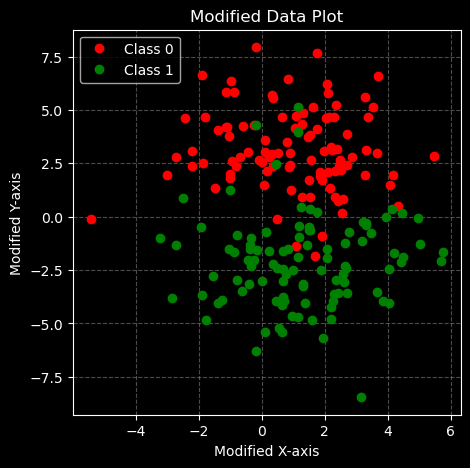

In [30]:
# Create data with different values
nSamples = 100
noise = 1.5

classA = [1, 3]
classB = [1, -2]

# Generate noisy data for two classes
data_classA = [classA[0] + np.random.randn(nSamples) * noise, classA[1] + np.random.randn(nSamples) * noise]
data_classB = [classB[0] + np.random.randn(nSamples) * noise, classB[1] + np.random.randn(nSamples) * noise]

# True labels
labels_np = np.vstack((np.zeros((nSamples, 1)), np.ones((nSamples, 1))))

# Concatenate into a matrix
data_np = np.hstack((data_classA, data_classB)).T

# Convert to PyTorch tensors
input_data = torch.tensor(data_np).float()
target_labels = torch.tensor(labels_np).float()

# Plot the data with modified style, labels, and title
plt.figure(figsize=(5, 5))
plt.plot(input_data[np.where(target_labels == 0)[0], 0], input_data[np.where(target_labels == 0)[0], 1], 'ro', label='Class 0')
plt.plot(input_data[np.where(target_labels == 1)[0], 0], input_data[np.where(target_labels == 1)[0], 1], 'go', label='Class 1')
plt.title('Modified Data Plot')
plt.xlabel('Modified X-axis')
plt.ylabel('Modified Y-axis')
plt.legend()
plt.grid(True, color='gray', linestyle='--', alpha=0.6)
plt.show()

# Explanation: This cell generates and visualizes synthetic data for classification.


In [31]:
def createModifiedANNModel(learningRate):

    # Define a neural network model
    modified_ann_model = nn.Sequential(
        nn.Linear(2, 16),
        nn.ReLU(),
        nn.Linear(16, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
        nn.Sigmoid()
    )

    # Define a loss function
    loss_function = nn.BCELoss()

    # Define an optimizer
    optimizer = torch.optim.SGD(modified_ann_model.parameters(), lr=learningRate)

    return modified_ann_model, loss_function, optimizer

# Explanation: This cell defines a modified artificial neural network (ANN) model with specified layers and activations.


In [32]:
# A function that trains the modified model
num_epochs = 1000

def trainModifiedModel(ann_model):

    # Initialize losses
    losses = torch.zeros(num_epochs)

    # Loop over epochs
    for epoch in range(num_epochs):

        # Forward pass
        predictions = ann_model(input_data)

        # Compute loss
        loss = loss_function(predictions, target_labels)
        losses[epoch] = loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final forward pass
    final_predictions = ann_model(input_data)

    # Compute accuracy
    accuracy = 100 * torch.mean(((final_predictions > 0.5) == target_labels).float())

    return losses, final_predictions, accuracy

# Explanation: This cell defines a function to train the modified ANN model and computes accuracy.


Modified Model Accuracy: 92.5%


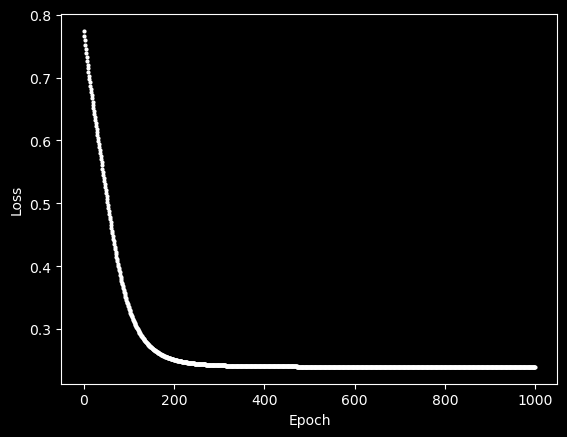

In [33]:
# Create the modified ANN model with a specified learning rate
modified_ann_model, loss_function, optimizer = createModifiedANNModel(0.01)

# Train the modified model
training_losses, model_predictions, model_accuracy = trainModifiedModel(modified_ann_model)

# Report accuracy
print('Modified Model Accuracy: %g%%' % model_accuracy)

# Show the training losses on a black background
plt.plot(training_losses.detach(), 'wo', markersize=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Explanation: This cell creates, trains, and evaluates the modified ANN model.


In [34]:
# Experiment with different learning rates
learning_rates = np.linspace(0.001, 0.1, 50)

# Initialize lists to store accuracy for each learning rate and losses for all epochs
accuracies_by_lr = []
all_losses = np.zeros((len(learning_rates), num_epochs))

# Loop through different learning rates
for i, lr in enumerate(learning_rates):
    # Create and train the model for the current learning rate
    modified_ann_model, loss_function, optimizer = createModifiedANNModel(lr)
    losses, predictions, total_accuracy = trainModifiedModel(modified_ann_model)

    # Store the results
    accuracies_by_lr.append(total_accuracy)
    all_losses[i, :] = losses.detach()

# Explanation: This cell experiments with different learning rates and records their corresponding accuracies.


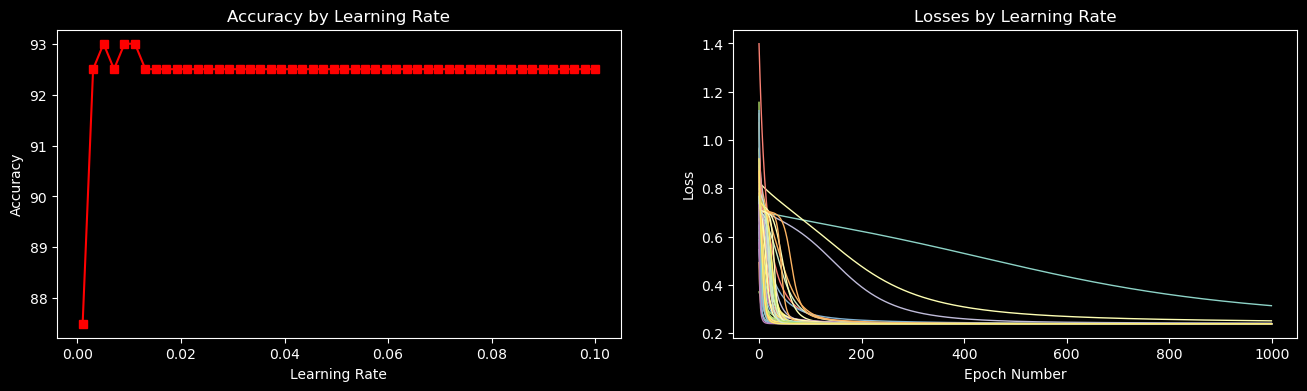

In [35]:
# Plot accuracy by learning rate
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(learning_rates, accuracies_by_lr, 'rs-')
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy by Learning Rate')

# Plot losses by learning rate
axes[1].plot(all_losses.T, linewidth=1)
axes[1].set_title('Losses by Learning Rate')
axes[1].set_xlabel('Epoch Number')
axes[1].set_ylabel('Loss')
plt.show()

# Explanation: This cell plots the accuracy and losses for different learning rates.


In [36]:
# Calculate the percentage of accuracies above 70%
percentage_above_70 = sum(torch.tensor(accuracies_by_lr) > 70) / len(accuracies_by_lr)

percentage_above_70

# Explanation: This cell calculates the percentage of accuracies above 70% among the different learning rates.


tensor(1.)